<a href="https://colab.research.google.com/github/kartikbatra056/Deep-Learning-with-Pytorch/blob/master/Cifar_10_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import Libraries
import torch
import torchvision
import torchvision.transforms as transforms

In [9]:
'''
Importing Cifar-10 data using torchvision libraries which load PILImages in range [0,1].
Converting  Images into Tensor and Normalizing Images in range [-1,1]
'''
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
 
train_data= torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)

train_loader=torch.utils.data.DataLoader(train_data,batch_size=4,shuffle=True,num_workers=2)

test_data=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)

train_loader=torch.utils.data.DataLoader(test_data,batch_size=4,num_workers=2)

classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


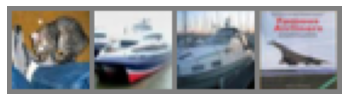

  cat        ship        ship       plane


In [10]:
from matplotlib import pyplot as plt
import numpy as np

#defining Function to show image
def show_image(img):
   img=img/2+0.5
   image=img.numpy()
   plt.imshow(np.transpose(image,(1,2,0)))
   plt.axis('off')
   plt.show()
#iterable for getting random images
dataiter=iter(train_loader)
 
images,labels=dataiter.next()
#show images
show_image(torchvision.utils.make_grid(images))
#print labels
print('       '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F
 
class Neural_net(nn.Module):
  def __init__(self,num_classes=10):
    
    super(Neural_net,self).__init__()
    
    self.conv1=nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding=1)
    self.batch1=nn.BatchNorm2d(num_features=32)
    self.relu1=nn.Relu()

    self.conv2=nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,stride=1,padding=1)
    self.batch2=nn.BatchNorm2d(num_features=32)
    self.relu2=nn.Relu()

    self.pool1=nn.MaxPool2d(kernel_size=2,stride=2)
    
    self.conv3=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=1)
    self.batch3=nn.BatchNorm2d(num_features=64)
    self.relu3=nn.Relu()

    self.conv4=nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,stride=1,padding=1)
    self.batch4=nn.BatchNorm2d(num_features=64)
    self.relu4=nn.Relu()

    self.pool2=nn.MaxPool2d(kernel_size=2,stride=2)
    
    self.conv5=nn.Conv2d(in_channels=64,out_channels=128,kernel_size=5,stride=1)
    self.batch5=nn.BatchNorm2d(num_features=128)
    self.relu5=nn.Relu()
 
    self.pool3=nn.AvgPool2d(kernel_size=4)

    self.fc=nn.Linear(in_features=128,out_features=num_classes)


def forward(self,input):
  output=self.conv1(input)
  output=self.batch1(output)
  output=self.relu1(output)

  output=self.conv2(output)
  output=self.batch2(output)
  output=self.relu2(output)

  output=self.pool1(output)

  output=self.conv3(output)
  output=self.batch3(output)
  output=self.relu3(output)

  output=self.conv4(output)
  output=self.batch4(output)
  output=self.relu4(output)

  output=self.pool2(output)
  
  output=self.conv5(output)
  output=self.batch5(output)
  output=self.relu5(output)

  output=self.pool3(output)

  output=output.view(-1,1*1*128)

  output=self.fc(output)

  return output

In [0]:
from torch.optim import Adam

cuda_avail=torch.cuda.is_available()

model=Neural_net(num_classes=10)

if cuda_avail:
  model.cuda()

optimizer=Adam(model.parameters(),lr=0.01)
loss_fn= nn.CrossEntropyLoss()

In [0]:
def adjust_learning_rate(epoch):
   lr=0.001

   if epoch>180:
     lr=lr/1000
   elif epoch>120:
     lr=lr/100
   elif epoch>60:
     lr=lr/10  

   for param in optimizer.param_groups:
     param['lr']=lr    

In [0]:
def save_model(epoch):
  torch.save(model.dict)